# Bölüm 1: Kütüphaneler ve Veri Yükleme #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Bölüm 2: Veri Keşfi (EDA) # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

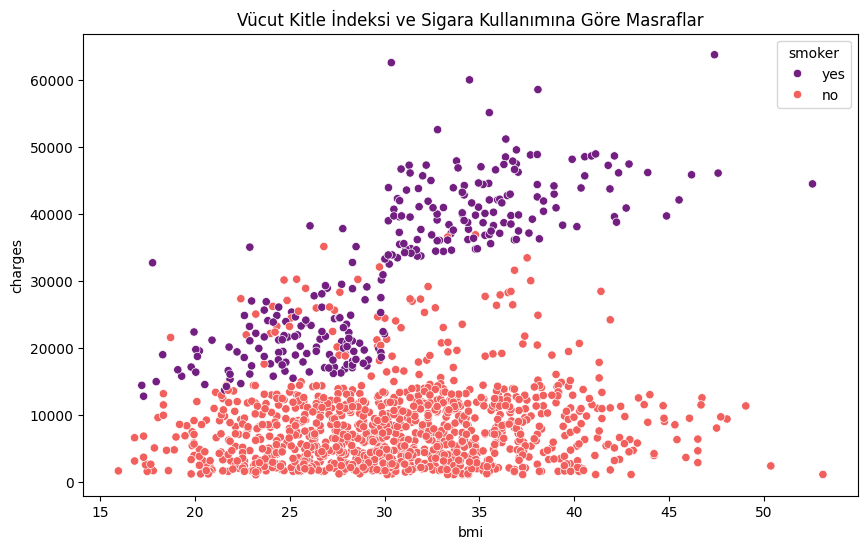

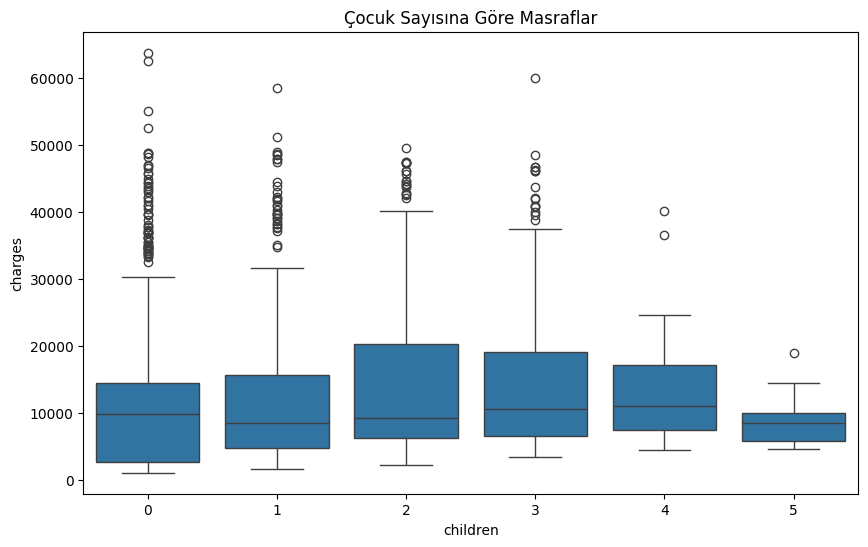

In [2]:
print(df.info())
print(df.describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='magma')
plt.title('Vücut Kitle İndeksi ve Sigara Kullanımına Göre Masraflar')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Çocuk Sayısına Göre Masraflar')
plt.show()

# Bölüm 3: Veri Ön İşleme (Encoding)


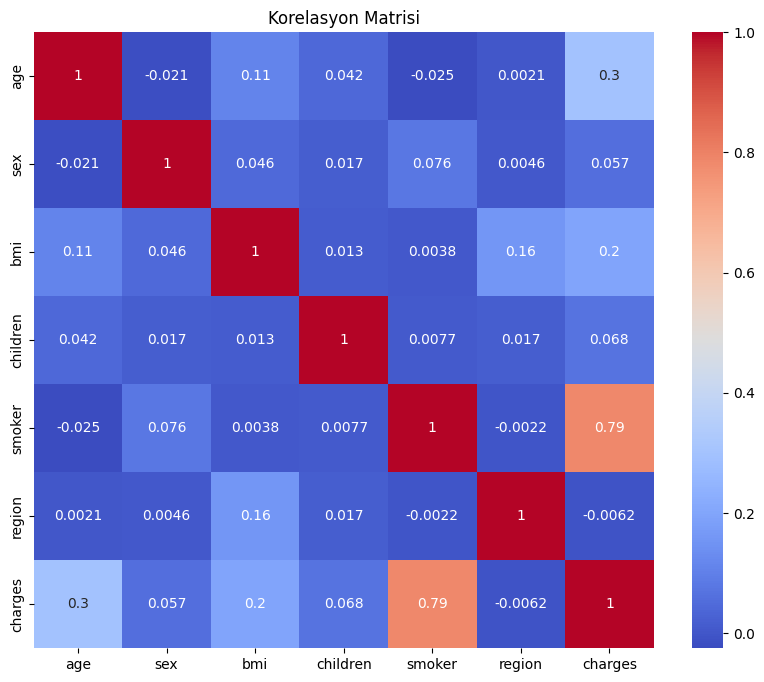

In [3]:
 le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

# ölüm 4: Model Kurulumu (Random Forest Regressor)

In [4]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Bölüm 5: Değerlendirme

Model Performans Metrikleri:
----------------------------
R2 Score (Başarı Oranı): 0.8643
MAE (Ortalama Mutlak Hata): 2533.67
MSE (Hata Kareler Ortalaması): 21073365.42
RMSE (Kök Ortalama Hata): 4590.57


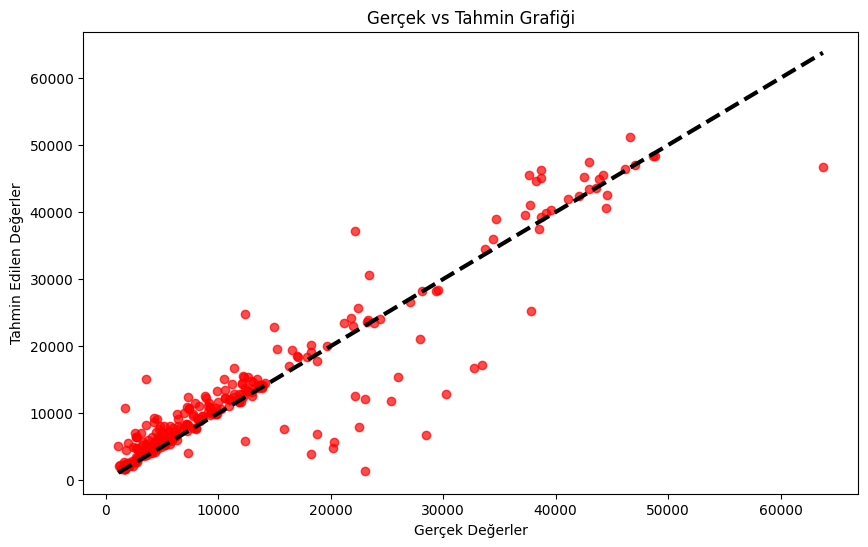

In [5]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performans Metrikleri:")
print("----------------------------")
print(f"R2 Score (Başarı Oranı): {r2:.4f}")
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"MSE (Hata Kareler Ortalaması): {mse:.2f}")
print(f"RMSE (Kök Ortalama Hata): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Grafiği')
plt.show()